In [67]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [68]:
df=pd.read_csv("/kaggle/input/elect-car-data/ElectCarData.csv")

In [36]:
df.head()

,Brand,Model,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,FastCharge_KmH,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro
0,Tesla,Model 3 Long Range Dual Motor,4.6,233,450,161,940,Yes,AWD,Type 2 CCS,Sedan,D,5,55480
1,Volkswagen,ID.3 Pure,10.0,160,270,167,250,Yes,RWD,Type 2 CCS,Hatchback,C,5,30000
2,Polestar,2,4.7,210,400,181,620,Yes,AWD,Type 2 CCS,Liftback,D,5,56440
3,BMW,iX3,6.8,180,360,206,560,Yes,RWD,Type 2 CCS,SUV,D,5,68040
4,Honda,e,9.5,145,170,168,190,Yes,RWD,Type 2 CCS,Hatchback,B,4,32997


In [69]:
df.isnull().sum()

Brand              0
Model              0
AccelSec           0
TopSpeed_KmH       0
Range_Km           0
Efficiency_WhKm    0
FastCharge_KmH     0
RapidCharge        0
PowerTrain         0
PlugType           0
BodyStyle          0
Segment            0
Seats              0
PriceEuro          0
dtype: int64

In [72]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
categorical_cols=["RapidCharge","PowerTrain","PlugType","BodyStyle","Segment"]
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

In [73]:
df.head(2)

,Brand,Model,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,FastCharge_KmH,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro
0,Tesla,Model 3 Long Range Dual Motor,4.6,233,450,161,940,1,0,2,7,3,5,55480
1,Volkswagen,ID.3 Pure,10.0,160,270,167,250,1,2,2,1,2,5,30000


In [74]:
df.FastCharge_KmH.unique()

array(['940', '250', '620', '560', '190', '220', '420', '650', '540',
       '440', '230', '380', '210', '590', '780', '170', '260', '930',
       '850', '910', '490', '470', '270', '450', '350', '710', '240',
       '390', '570', '610', '340', '730', '920', '-', '550', '900', '520',
       '430', '890', '410', '770', '460', '360', '810', '480', '290',
       '330', '740', '510', '320', '500'], dtype=object)

CHOOSING THE TOP SPEED AND FAST CHARGING ATTRIBUTES

In [76]:
X = df.iloc[:,[3,5]].values

In [77]:
print(X)

[[233 161]
 [160 167]
 [210 181]
 [180 206]
 [145 168]
 [250 180]
 [150 168]
 [150 164]
 [225 153]
 [180 193]
 [180 216]
 [144 164]
 [167 160]
 [200 178]
 [165 153]
 [160 175]
 [260 223]
 [130 166]
 [140 193]
 [150 156]
 [150 164]
 [217 171]
 [160 179]
 [240 197]
 [261 167]
 [160 183]
 [160 166]
 [180 200]
 [150 161]
 [150 180]
 [190 231]
 [167 173]
 [135 165]
 [210 267]
 [150 178]
 [157 172]
 [160 193]
 [160 181]
 [140 168]
 [200 171]
 [250 184]
 [155 154]
 [200 228]
 [130 166]
 [130 166]
 [167 175]
 [150 173]
 [250 195]
 [150 104]
 [150 188]
 [200 237]
 [410 206]
 [150 176]
 [160 183]
 [250 211]
 [145 168]
 [150 180]
 [135 164]
 [150 180]
 [261 188]
 [135 161]
 [241 177]
 [160 198]
 [200 232]
 [180 200]
 [250 197]
 [123 200]
 [190 261]
 [130 194]
 [180 209]
 [160 165]
 [160 193]
 [250 217]
 [190 244]
 [140 156]
 [155 167]
 [180 188]
 [130 176]
 [180 206]
 [260 215]
 [160 171]
 [250 216]
 [130 167]
 [180 194]
 [140 273]
 [150 168]
 [180 256]
 [190 219]
 [180 193]
 [160 181]
 [210 270]

In [78]:
# finding wcss value for different number of clusters
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
  kmeans = KMeans(n_clusters=i, init='k-means++', random_state=0)
  kmeans.fit(X)
  wcss.append(kmeans.inertia_)

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:8

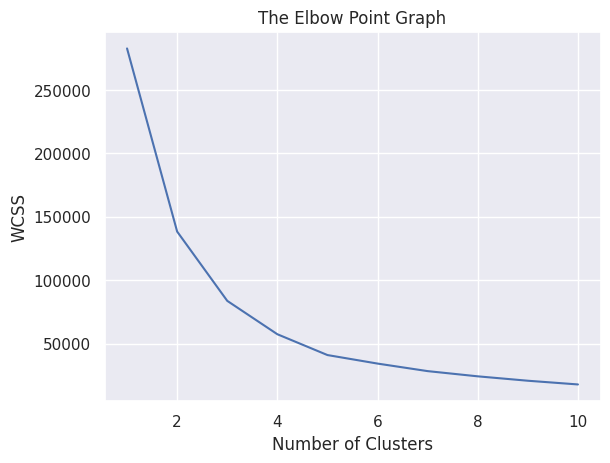

In [79]:
sns.set()
plt.plot(range(1,11), wcss)
plt.title('The Elbow Point Graph')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [80]:
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=0)

# return a label for each data point based on their cluster
Y = kmeans.fit_predict(X)

print(Y)

[2 0 2 1 0 2 0 0 2 0 1 0 0 0 0 0 2 0 0 0 0 2 0 2 2 0 0 1 0 0 1 0 0 1 0 0 0
 0 0 0 2 0 1 0 0 0 0 2 0 0 1 2 0 0 2 0 0 0 0 2 0 2 0 1 1 2 0 1 0 1 0 0 2 1
 0 0 0 0 1 2 0 2 0 0 1 0 1 1 0 0 1 0 0 1 0 0 0 1 0 1 1 1 1]


/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


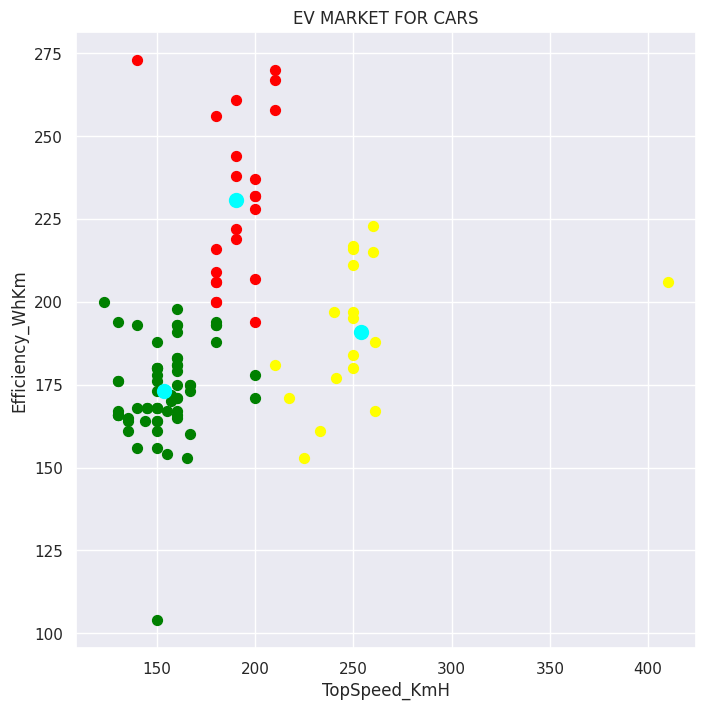

In [81]:

plt.figure(figsize=(8,8))
plt.scatter(X[Y==0,0], X[Y==0,1], s=50, c='green', label='Cluster 1')
plt.scatter(X[Y==1,0], X[Y==1,1], s=50, c='red', label='Cluster 2')
plt.scatter(X[Y==2,0], X[Y==2,1], s=50, c='yellow', label='Cluster 3')
# plot the centroids
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=100, c='cyan', label='Centroids')
plt.title('EV MARKET FOR CARS')
plt.xlabel('TopSpeed_KmH')
plt.ylabel('Efficiency_WhKm')
plt.show()

In [82]:
kmeans.inertia_

83664.6347981923

In [83]:
df.head()

,Brand,Model,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,FastCharge_KmH,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro
0,Tesla,Model 3 Long Range Dual Motor,4.6,233,450,161,940,1,0,2,7,3,5,55480
1,Volkswagen,ID.3 Pure,10.0,160,270,167,250,1,2,2,1,2,5,30000
2,Polestar,2,4.7,210,400,181,620,1,0,2,2,3,5,56440
3,BMW,iX3,6.8,180,360,206,560,1,2,2,6,3,5,68040
4,Honda,e,9.5,145,170,168,190,1,2,2,1,1,4,32997


APPLYING PRINCIPLE COMPONENT ANALYSIS


In [85]:
features = ['AccelSec','TopSpeed_KmH','Efficiency_WhKm', 'RapidCharge','Range_Km', 'Seats','PowerTrain',"PriceEuro"]
from sklearn.preprocessing import StandardScaler
# Separating out the features
scale = df.loc[:, features].values
scale= StandardScaler().fit_transform(scale)

In [86]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
t = pca.fit_transform(scale)
data2 = pd.DataFrame(t, columns=['PC1', 'PC2'])
data2

,PC1,PC2
0,1.511285,0.211975
1,-1.740644,-0.582778
2,1.292997,0.020945
3,0.021276,-0.115449
4,-2.327960,0.244931
...,...,...
98,-0.338325,-0.462721
99,2.279502,0.230222
100,0.815126,-0.164293
101,1.617635,-0.089687


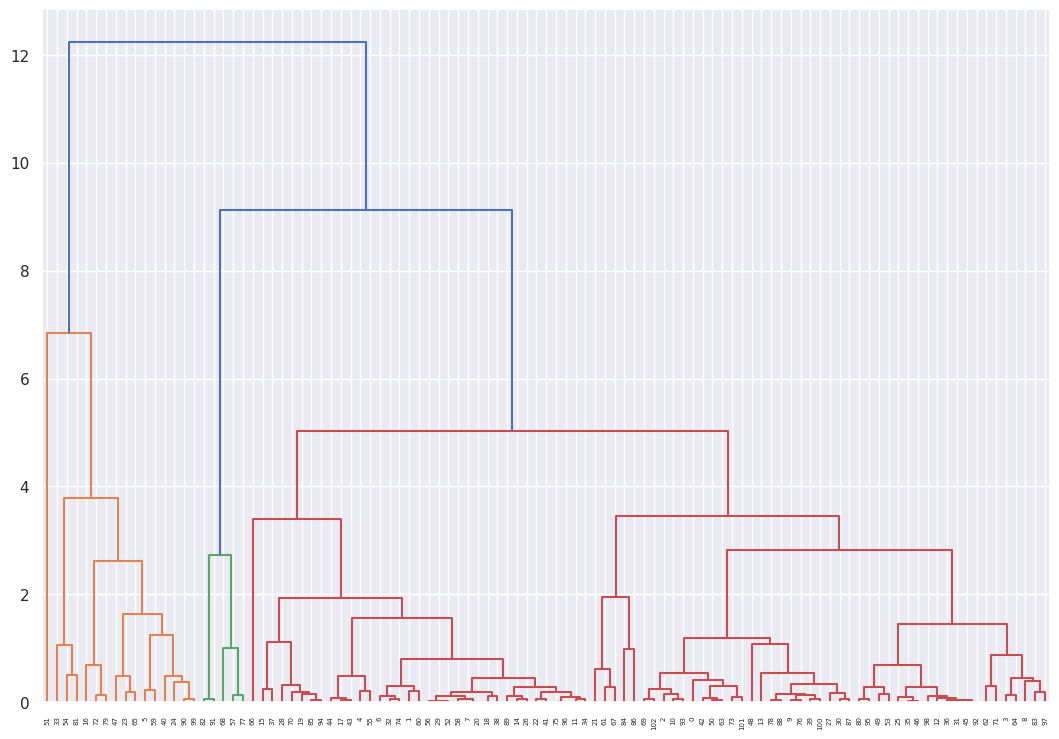

In [87]:
from scipy.cluster.hierarchy import dendrogram, linkage
linked = linkage(data2, 'complete')
plt.figure(figsize=(13, 9))
dendrogram(linked, orientation='top')
plt.show()

In [88]:
wcss1 = []

for i in range(1,11):
  kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
  kmeans.fit(t)
  wcss1.append(kmeans.inertia_)

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:8

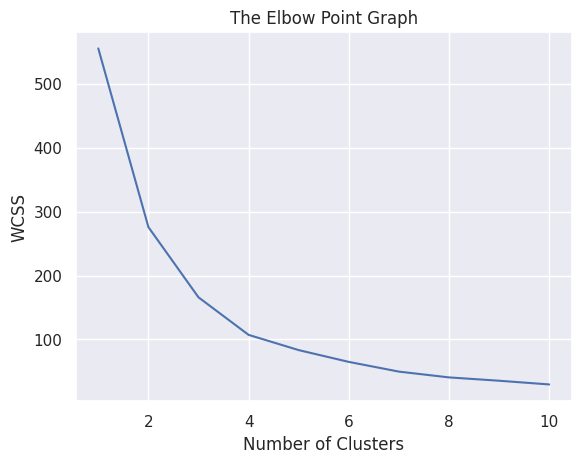

In [89]:
# plot an elbow graph
sns.set()
plt.plot(range(1,11), wcss1)
plt.title('The Elbow Point Graph')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [90]:
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=0)
# return a label for each data point based on their cluster
Y1= kmeans.fit_predict(t)
print(Y1)

[3 1 3 1 1 0 1 1 1 3 3 1 1 3 1 1 0 1 1 1 1 3 1 0 3 1 1 3 1 1 3 1 1 3 1 1 1
 1 1 3 3 1 3 1 1 1 1 0 3 1 3 0 1 1 3 1 1 2 1 0 1 3 1 3 1 0 1 3 2 3 1 3 0 3
 1 1 3 2 3 0 1 3 2 1 3 1 3 3 3 1 3 2 1 3 1 1 1 1 1 3 3 3 3]


/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


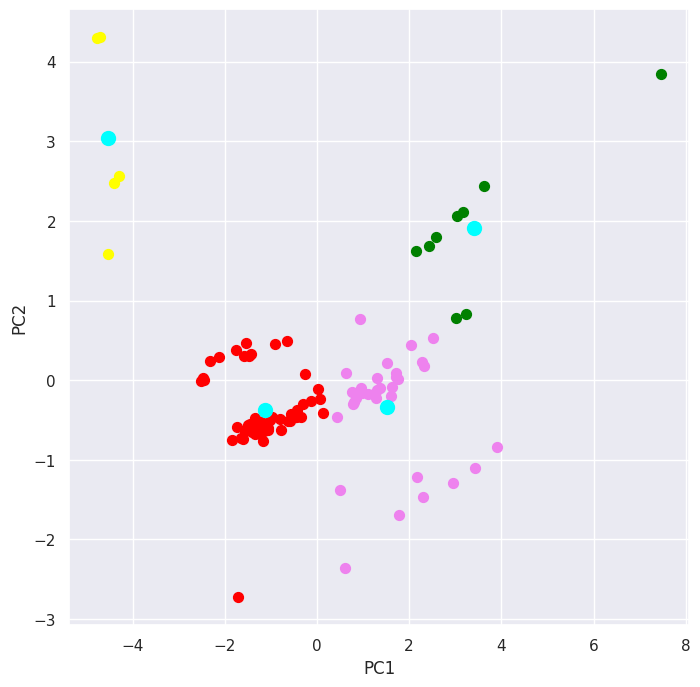

In [91]:
plt.figure(figsize=(8,8))
plt.scatter(t[Y1==0,0], t[Y1==0,1], s=50, c='green', label='Cluster 1')
plt.scatter(t[Y1==1,0], t[Y1==1,1], s=50, c='red', label='Cluster 2')
plt.scatter(t[Y1==2,0], t[Y1==2,1], s=50, c='yellow', label='Cluster 3')
plt.scatter(t[Y1==3,0], t[Y1==3,1], s=50, c='violet', label='Cluster 4')
# plot the centroids
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=100, c='cyan', label='Centroids')
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

In [92]:
kmeans.inertia_

107.08971916002176

CHECKING THE KMEANS ACCURACY BY CONSIDERING DIFFERENT ATTRIBUTES

In [93]:
df.sample(2)

,Brand,Model,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,FastCharge_KmH,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro
91,Smart,EQ fortwo cabrio,11.9,130,95,176,-,0,2,1,0,0,2,24565
59,Tesla,Model S Performance,2.5,261,505,188,550,1,0,1,2,5,5,96990


In [94]:
x3=df.iloc[:,[11,13]].values
x3

array([[     3,  55480],
       [     2,  30000],
       [     3,  56440],
       [     3,  68040],
       [     1,  32997],
       [     5, 105000],
       [     2,  31900],
       [     1,  29682],
       [     3,  46380],
       [     3,  55000],
       [     3,  69484],
       [     2,  29234],
       [     1,  40795],
       [     3,  65000],
       [     2,  34459],
       [     2,  40936],
       [     5, 180781],
       [     0,  21421],
       [     1,  30000],
       [     1,  31681],
       [     1,  29146],
       [     3,  58620],
       [     2,  35000],
       [     5, 125000],
       [     3,  61480],
       [     2,  45000],
       [     2,  33000],
       [     2,  60437],
       [     1,  38017],
       [     1,  34361],
       [     4,  67358],
       [     2,  38105],
       [     1,  31184],
       [     6,  75000],
       [     2,  32646],
       [     2,  37237],
       [     2,  50000],
       [     2,  45000],
       [     1,  33133],
       [     2,  45000],


## CHOOSING THE NUMBER OF CLUSTERS

In [95]:
wcss3 = []
for i in range(1,11):
  kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
  kmeans.fit(x3)
  wcss3.append(kmeans.inertia_)

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:8

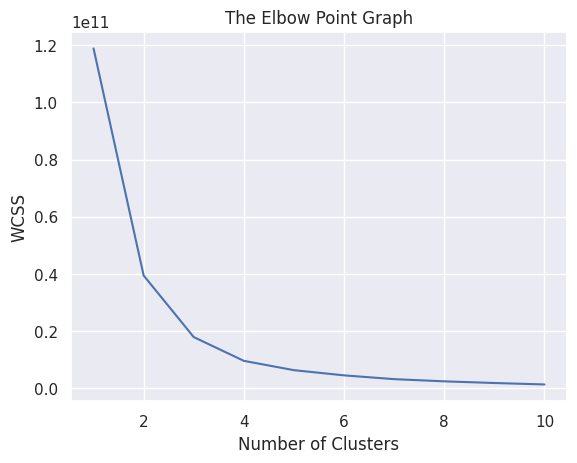

In [96]:
# plot an elbow graph
sns.set()
plt.plot(range(1,11), wcss3)
plt.title('The Elbow Point Graph')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [97]:
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=0)
# return a label for each data point based on their cluster
Y3 = kmeans.fit_predict(x3)

print(Y3)

[0 2 0 0 2 3 2 2 2 0 0 2 2 0 2 2 1 2 2 2 2 0 2 3 0 2 2 0 2 2 0 2 2 0 2 2 0
 2 2 2 0 2 0 2 2 2 2 3 1 2 0 1 2 2 3 2 2 2 2 3 2 0 0 0 0 3 2 0 2 0 2 2 1 0
 2 2 0 2 0 1 2 3 2 2 0 2 2 0 2 2 3 2 2 0 2 2 2 0 2 3 0 0 0]


/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


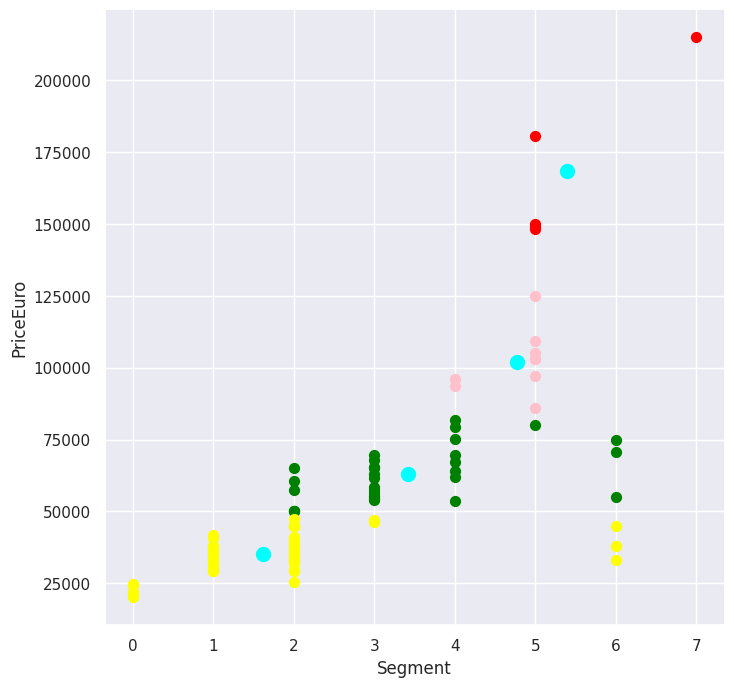

In [98]:
# plotting all the clusters and their Centroids

plt.figure(figsize=(8,8))
plt.scatter(x3[Y3==0,0], x3[Y3==0,1], s=50, c='green', label='Cluster 1')
plt.scatter(x3[Y3==1,0], x3[Y3==1,1], s=50, c='red', label='Cluster 2')
plt.scatter(x3[Y3==2,0], x3[Y3==2,1], s=50, c='yellow', label='Cluster 3')
plt.scatter(x3[Y3==3,0], x3[Y3==3,1], s=50, c='pink', label='Cluster 4')
# plot the centroids
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=100, c='cyan', label='Centroids')
plt.xlabel('Segment')
plt.ylabel('PriceEuro')
plt.show()

In [99]:
kmeans.inertia_

9620925081.075998

## VISUALIZATION

## CAR EFFICIENCY

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]),
 [Text(0, 0, 'Tesla '),
  Text(1, 0, 'Volkswagen '),
  Text(2, 0, 'Polestar '),
  Text(3, 0, 'BMW '),
  Text(4, 0, 'Honda '),
  Text(5, 0, 'Lucid '),
  Text(6, 0, 'Peugeot '),
  Text(7, 0, 'Audi '),
  Text(8, 0, 'Mercedes '),
  Text(9, 0, 'Nissan '),
  Text(10, 0, 'Hyundai '),
  Text(11, 0, 'Porsche '),
  Text(12, 0, 'MG '),
  Text(13, 0, 'Mini '),
  Text(14, 0, 'Opel '),
  Text(15, 0, 'Skoda '),
  Text(16, 0, 'Volvo '),
  Text(17, 0, 'Kia '),
  Text(18, 0, 'Renault '),
  Text(19, 0, 'Mazda '),
  Text(20, 0, 'Lexus '),
  Text(21, 0, 'CUPRA '),
  Text(22, 0, 'SEAT '),
  Text(23, 0, 'Lightyear '),
  Text(24, 0, 'Aiways '),
  Text(25, 0, 'DS '),
  Text(26, 0, 'Citroen '),
  Text(27, 0, 'Jaguar '),
  Text(28, 0, 'Ford '),
  Text(29, 0, 'Byton '),
  Text(30, 0, 'Sono '),
  Text(31, 0, 'Smart '),
  Text(32, 0, 'Fiat ')])

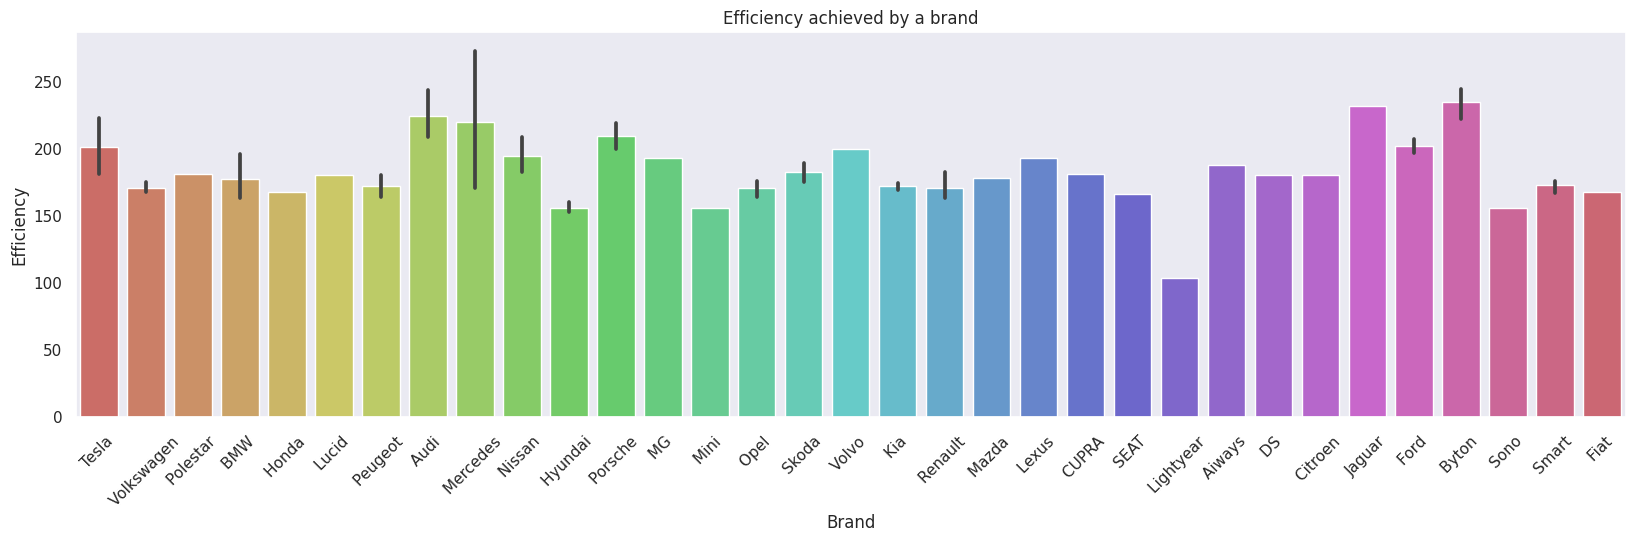

In [100]:
ax= plt.figure(figsize=(20,5))
sns.barplot(x='Brand',y='Efficiency_WhKm',data=df,palette='hls')
plt.grid(axis='y')
plt.title('Efficiency achieved by a brand')
plt.xlabel('Brand')
plt.ylabel('Efficiency')
plt.xticks(rotation=45)

## CAR AND THE BODY STYLE

Text(0.5, 1.0, 'Body Style')

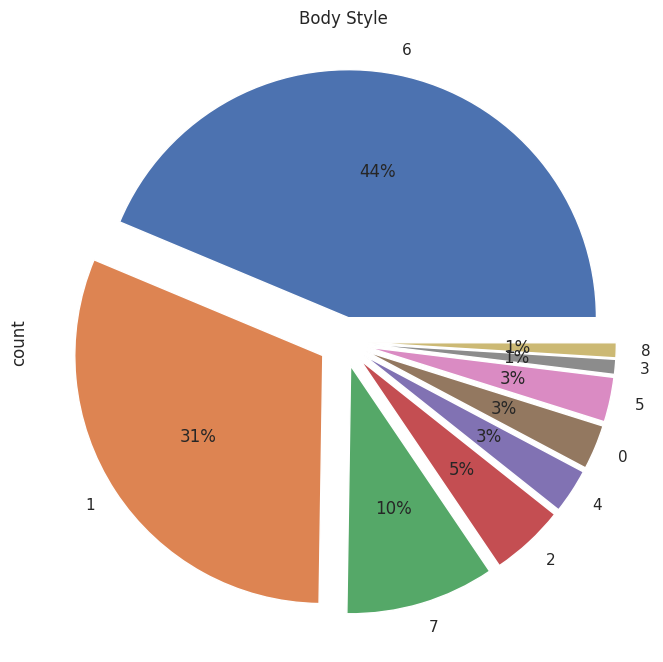

In [101]:
df['BodyStyle'].value_counts().plot.pie(figsize=(8,15),autopct='%.0f%%',explode=(0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1))
plt.title('Body Style')

## HEAT MAP FOR CORRELATION BETWEEN VARIABLES

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


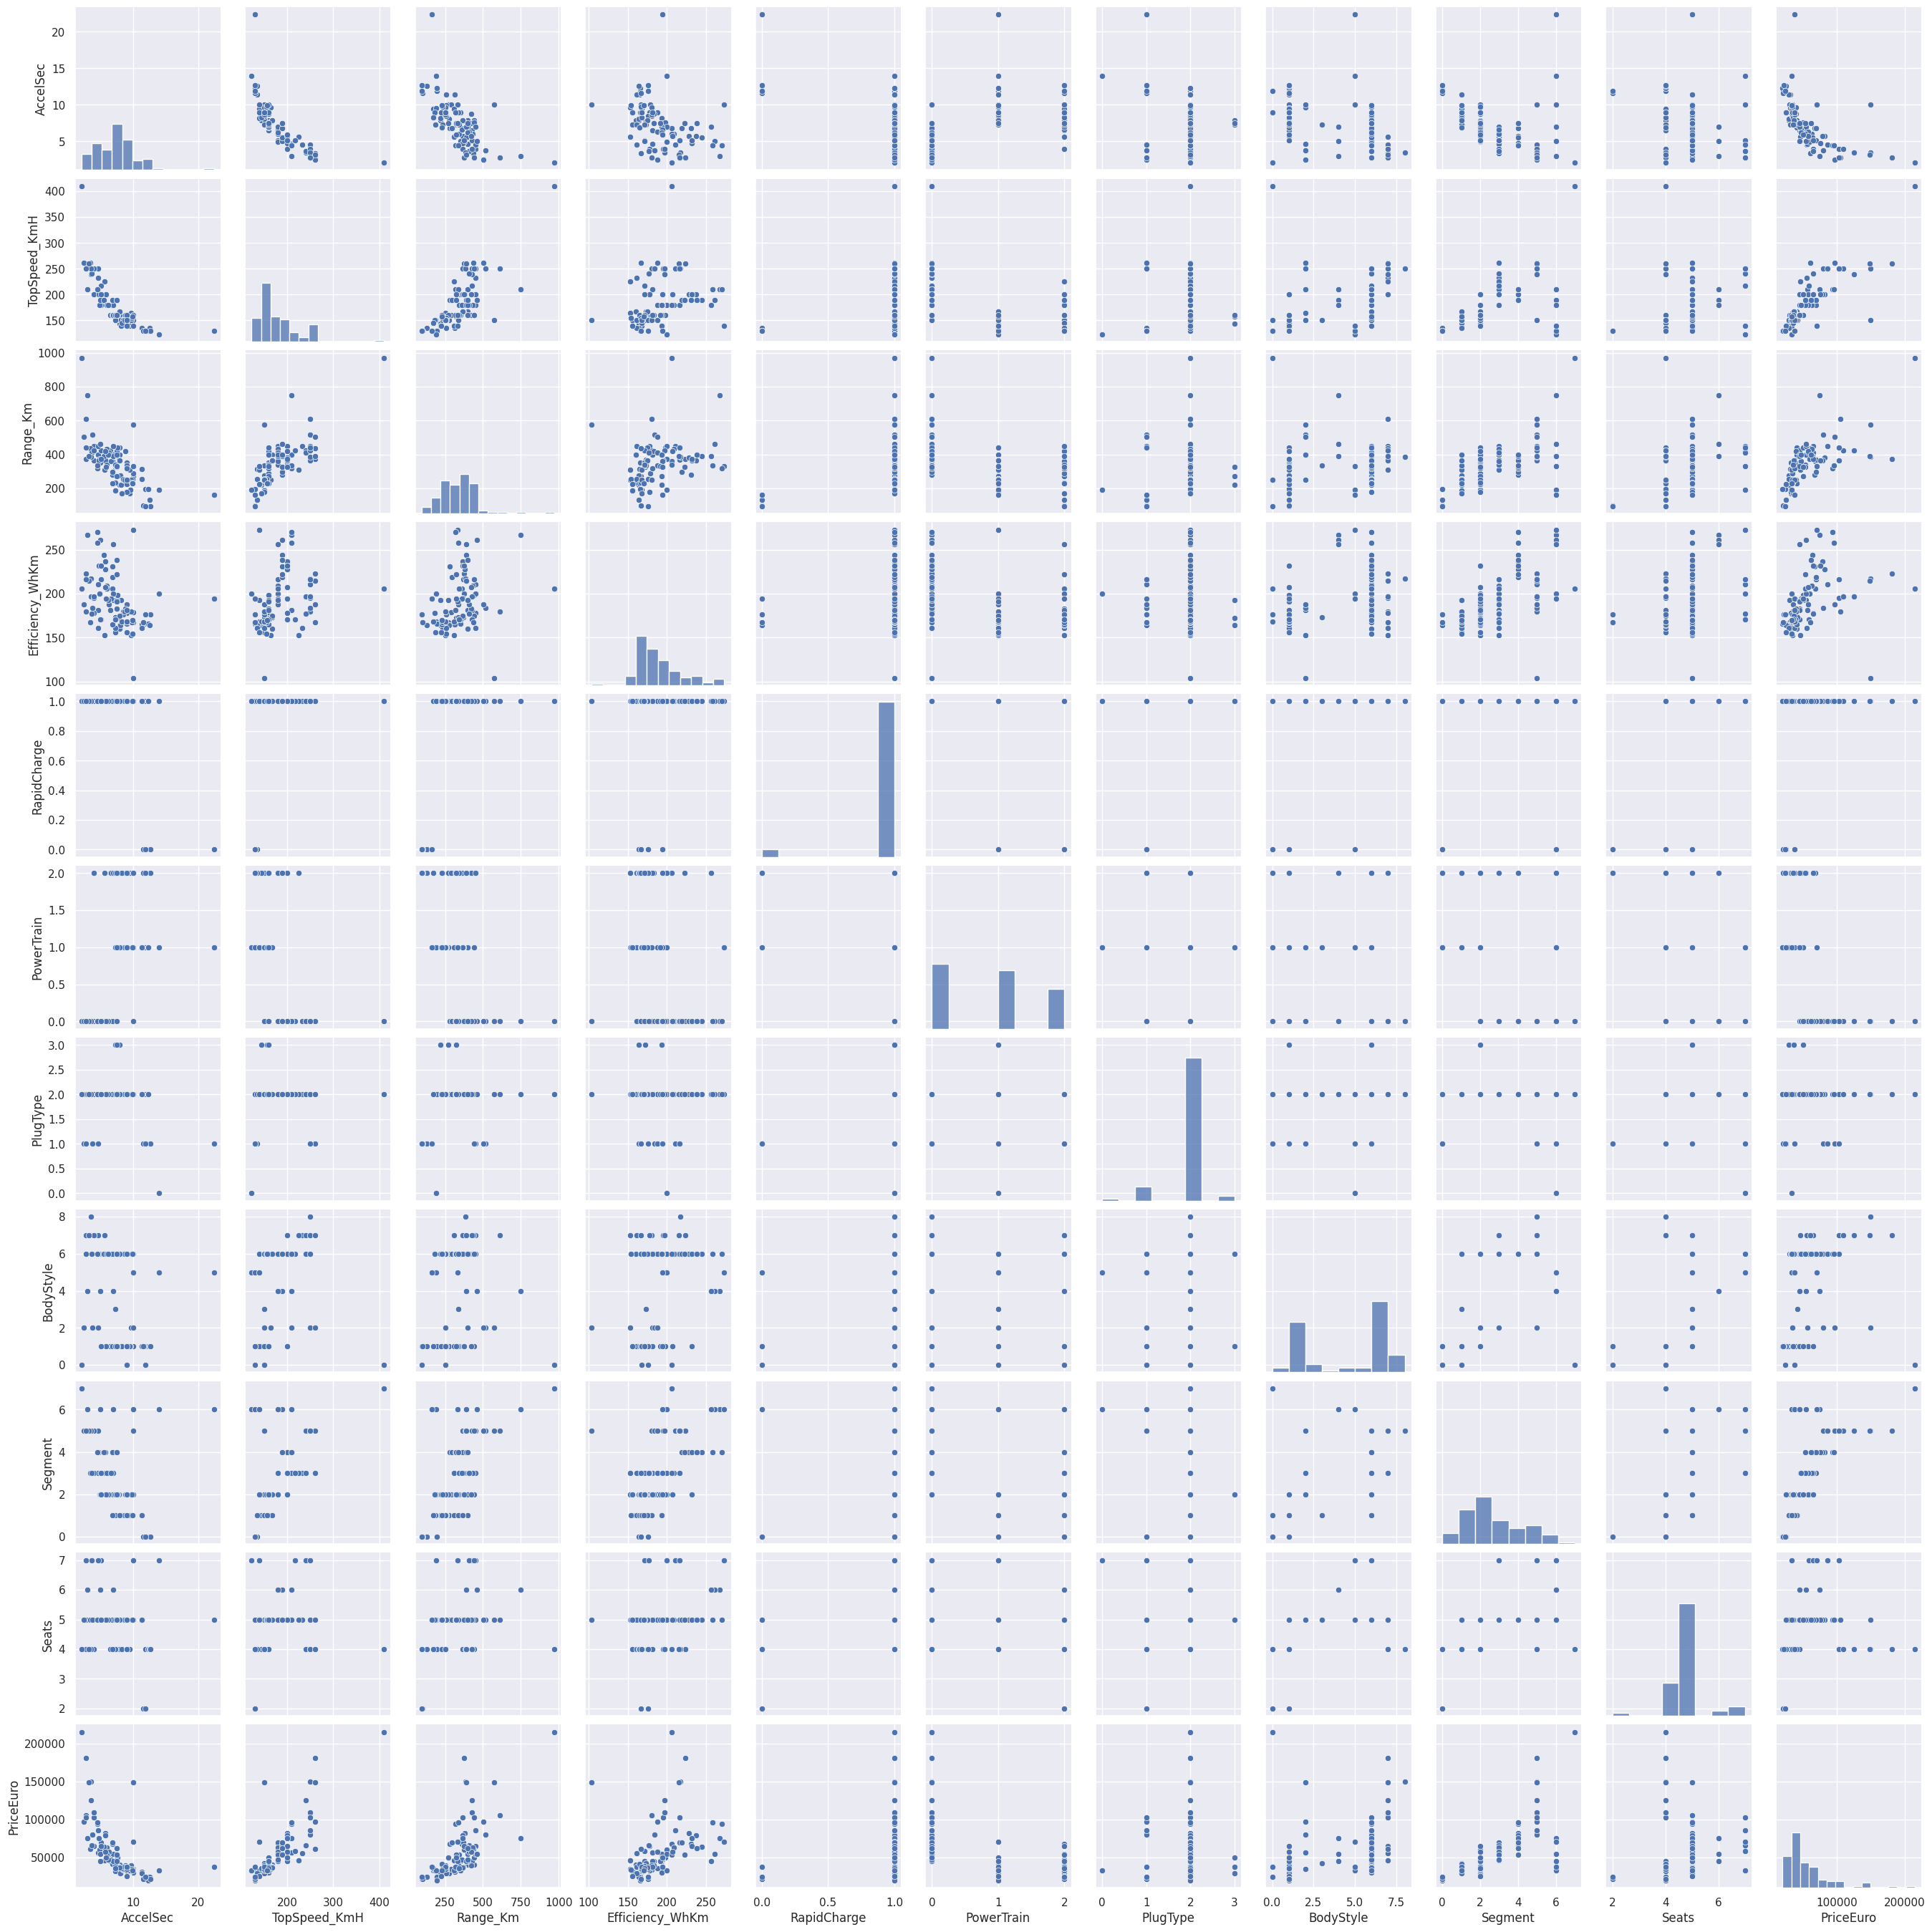

In [105]:
sns.pairplot(df)

/tmp/ipykernel_32/462080349.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.Segment)


<Axes: xlabel='Segment', ylabel='Density'>

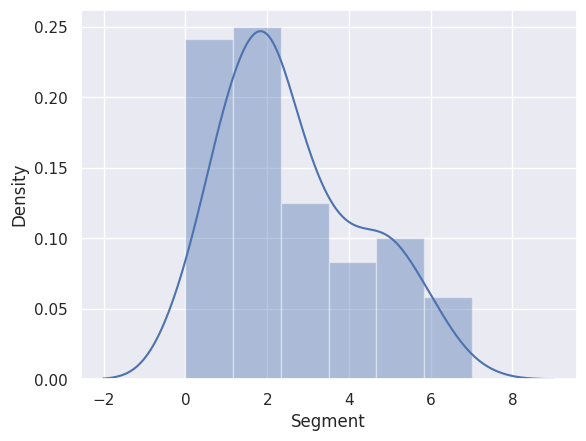

In [106]:
sns.distplot(df.Segment)

<Axes: xlabel='Seats', ylabel='Count'>

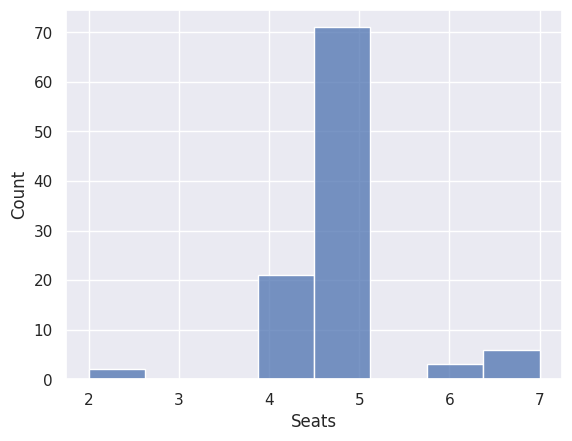

In [107]:
sns.histplot(df.Seats)

<Axes: >

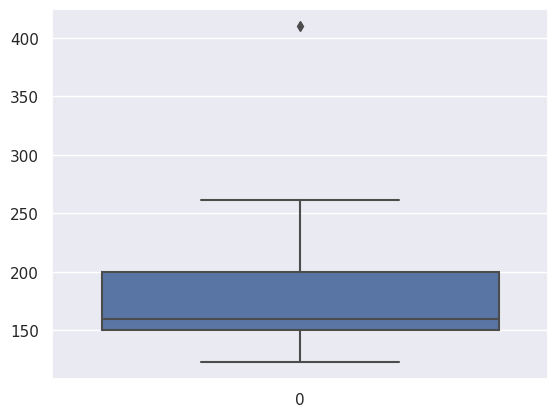

In [108]:
sns.boxplot(df.TopSpeed_KmH)

## QUESTIONS:

## **Which vehicle has max range (km) under 50,000 Euros?**

In [111]:
df['FullName'] = df['Brand'] + '-' + df['Model']
df_1 = df.loc[df['PriceEuro'] <= 50000]
df_2 = df.loc[df['PriceEuro'] > 50000]
t1 = 'Less than 50,000 Euros'
t2 = 'More than 50,000 Euros'

In [112]:
pd.set_option('display.max_columns', None)
top_range_1 = df.sort_values(by= 'Range_Km', ascending= False)
print(top_range_1[['FullName', 'Range_Km' ,'PriceEuro', 'RapidCharge']])

                       FullName  Range_Km  PriceEuro  RapidCharge
51             Tesla -Roadster        970     215000            1
33  Tesla -Cybertruck Tri Motor       750      75000            1
5                   Lucid -Air        610     105000            1
48              Lightyear -One        575     149000            1
40    Tesla -Model S Long Range       515      79990            1
..                          ...       ...        ...          ...
68   Renault -Kangoo Maxi ZE 33       160      38000            0
57           Renault -Twingo ZE       130      24790            0
82       Smart -EQ fortwo coupe       100      21387            0
77           Smart -EQ forfour         95      22030            0
91      Smart -EQ fortwo cabrio        95      24565            0

[103 rows x 4 columns]


## **Which vehicle has max range(Km) costing more than 50,000 Euros?**

In [113]:
pd.set_option('display.max_columns', None)
top_range_2 = df_2.sort_values(by= 'Range_Km', ascending= False)
print(top_range_2[['FullName', 'Range_Km' ,'PriceEuro', 'RapidCharge']])

                                    FullName  Range_Km  PriceEuro  RapidCharge
51                          Tesla -Roadster        970     215000            1
33               Tesla -Cybertruck Tri Motor       750      75000            1
5                                Lucid -Air        610     105000            1
48                           Lightyear -One        575     149000            1
40                 Tesla -Model S Long Range       515      79990            1
59                Tesla -Model S Performance       505      96990            1
67              Tesla -Cybertruck Dual Motor       460      55000            1
64               Ford -Mustang Mach-E ER RWD       450      54475            1
54                 Tesla -Model X Long Range       450      85990            1
0       Tesla -Model 3 Long Range Dual Motor       450      55480            1
13                                  BMW -i4        450      65000            1
81                Tesla -Model X Performance       4

## **Vehicles with best acceleration under 50,000 Euros?**

In [114]:
pd.set_option('display.max_columns', None)
acceleration_1 = df_1.sort_values(by= 'AccelSec')
print(acceleration_1[['FullName','AccelSec', 'Range_Km', 'PowerTrain' ,'PriceEuro']])

                               FullName  AccelSec  Range_Km  PowerTrain  \
39                       Mercedes -EQA        5.0       350           0   
8    Tesla -Model 3 Standard Range Plus       5.6       310           2   
100         Nissan -Ariya e-4ORCE 63kWh       5.9       325           0   
88                  Skoda -Enyaq iV vRS       6.2       400           0   
37                      CUPRA -el-Born        6.5       425           2   
..                                  ...       ...       ...         ...   
43                   Skoda -CITIGOe iV       12.3       195           1   
57                   Renault -Twingo ZE      12.6       130           2   
77                   Smart -EQ forfour       12.7        95           2   
66              Nissan -e-NV200 Evalia       14.0       190           1   
68           Renault -Kangoo Maxi ZE 33      22.4       160           1   

     PriceEuro  
39       45000  
8        46380  
100      50000  
88       47500  
37       45000